<a href="https://colab.research.google.com/github/Einsteinious/Project-3-4-EDA-Machine-Learning/blob/main/Project3%264_customer_behavior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score, precision_recall_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.optimizers import Adam

In [98]:
#importing the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/OESON programming/Project3&4/Data.csv')

In [99]:
#displaying the first 20 rows of the dataset
data.head(10)

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.200000,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.140000,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.050000,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.200000,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.200000,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False
5,0.0,0.0,0.0,0.0,3.0,738.000000,0.00,0.022222,0.0,0.4,...,4.0,1.0,2.0,Returning_Visitor,Female,Required,Not Specified,Other,0.0,False
6,0.0,0.0,0.0,0.0,3.0,395.000000,0.00,0.066667,0.0,0.0,...,1.0,3.0,3.0,Returning_Visitor,Female,ALL,Diploma,Married,0.0,False
7,0.0,0.0,0.0,0.0,7.0,280.500000,0.00,0.028571,0.0,0.0,...,1.0,1.0,3.0,Returning_Visitor,Female,Deny,Diploma,Other,0.0,False
8,0.0,0.0,0.0,0.0,6.0,98.000000,0.00,0.066667,0.0,0.0,...,5.0,1.0,3.0,Returning_Visitor,Not Specified,Deny,Graduate,Single,0.0,False
9,0.0,0.0,0.0,0.0,2.0,68.000000,0.00,0.100000,0.0,0.0,...,2.0,3.0,3.0,Returning_Visitor,Male,Required,Diploma,Single,0.0,False


<font color="lightblue"> The dataset contains various columns, including:

*  HomePage: Number of times the consumer visited the homepage.
*  HomePage_Duration: Duration of the consumer's visit to the homepage.
*  LandingPage: Number of times the consumer visited the landing page.
*  LandingPage_Duration: Duration of the consumer's visit to the landing page.
*  ProductDescriptionPage: Number of times the consumer visited the product description page.
*  ProductDescriptionPage_Duration: Duration of the consumer's visit to the product description page.
*  GoogleMetric:Bounce Rates: Bounce rate as measured by Google Analytics.
*  GoogleMetric:Exit Rates: Exit rate as measured by Google Analytics.
*  GoogleMetric:Page Values: Page value as measured by Google Analytics.
*  SeasonalPurchase: Whether the consumer made a seasonal purchase (1) or not (0).
*   Month_SeasonalPurchase: Month of seasonal purchase.
*   OS: Operating system used by the consumer.
*   SearchEngine: Search engine used by the consumer.
*   Zone: Zone of the website visited by the consumer.
*   Type of Traffic: Type of traffic source.
*   CustomerType: Type of customer (new or returning).
*   Gender: Gender of the consumer.
*   Cookies Setting: Cookies setting of the consumer.
*   Education: Education level of the consumer.
*   Marital Status: Marital status of the consumer.
*   WeekendPurchase: Whether the consumer made a purchase on the weekend (1) or not (0).
*   Made_Purchase: Whether the consumer made a purchase (1) or not (0). (True/False)

<font color='lightblue'> This project aims to uncover insights from website visitor data and build a model to predict which visitors are most likely to purchase a product, helping us target marketing efforts and personalize the customer experience.

In [100]:
#number of entries total
data.count()

HomePage                           14578
HomePage_Duration                  14581
LandingPage                        14578
LandingPage_Duration               14596
ProductDescriptionPage             14608
ProductDescriptionPage_Duration    14564
GoogleMetric:Bounce Rates          14580
GoogleMetric:Exit Rates            14602
GoogleMetric:Page Values           14599
SeasonalPurchase                   14581
Month_SeasonalPurchase             14587
OS                                 14597
SearchEngine                       14609
Zone                               14614
Type of Traffic                    14588
CustomerType                       14587
Gender                             14586
Cookies Setting                    14587
Education                          14595
Marital Status                     14601
WeekendPurchase                    14610
Made_Purchase                      14731
dtype: int64

In [101]:
#here we get information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

<font color='lightblue'> So we saw the columns, how many entries there are for each of them and what kind are they.

<font color='lightblue'> We can see that some entries are not matching hence will try to recover those blank cells

In [102]:
data.describe()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,WeekendPurchase
count,14578.000000,14581.000000,14578.000000,14596.000000,14608.000000,14564.000000,14580.000000,14602.000000,14599.000000,14581.000000,14597.000000,14609.000000,14614.000000,14588.000000,14610.000000
mean,2.250240,79.300762,0.490739,33.455943,31.559488,1184.346084,0.023366,0.044664,4.812620,0.064083,2.122422,2.356629,3.155673,4.090143,0.234155
std,3.288042,179.374699,1.252376,140.146256,44.897089,2009.496307,0.050011,0.049912,16.887366,0.202583,0.914404,1.721823,2.405155,4.040147,0.423484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,173.187500,0.000000,0.014502,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,5.000000,0.000000,0.000000,17.500000,584.333333,0.003478,0.026406,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,3.000000,91.000000,0.000000,0.000000,38.000000,1434.255128,0.018182,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000


In [103]:
#here we fill numerical and categorical data with with mean and mode (most frequent value)
numerical_cells=data.select_dtypes(include='float').columns
categorical_cells=data.select_dtypes(include='object').columns
data[numerical_cells] = data[numerical_cells].fillna(data[numerical_cells].mean())
data[categorical_cells] = data[categorical_cells].fillna(data[categorical_cells].mode().iloc[0])
#now we test the columns if matching
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14731 non-null  float64
 1   HomePage_Duration                14731 non-null  float64
 2   LandingPage                      14731 non-null  float64
 3   LandingPage_Duration             14731 non-null  float64
 4   ProductDescriptionPage           14731 non-null  float64
 5   ProductDescriptionPage_Duration  14731 non-null  float64
 6   GoogleMetric:Bounce Rates        14731 non-null  float64
 7   GoogleMetric:Exit Rates          14731 non-null  float64
 8   GoogleMetric:Page Values         14731 non-null  float64
 9   SeasonalPurchase                 14731 non-null  float64
 10  Month_SeasonalPurchase           14731 non-null  object 
 11  OS                               14731 non-null  float64
 12  SearchEngine      

<font color='lightblue'> During feature selection, I identified strong correlations (above 0.84) between two pairs of features. This suggests substantial redundancy in the information they provide. To optimize the feature set and avoid repetition, I opted to remove one feature from each pair, ensuring diverse and informative data for further analysis.

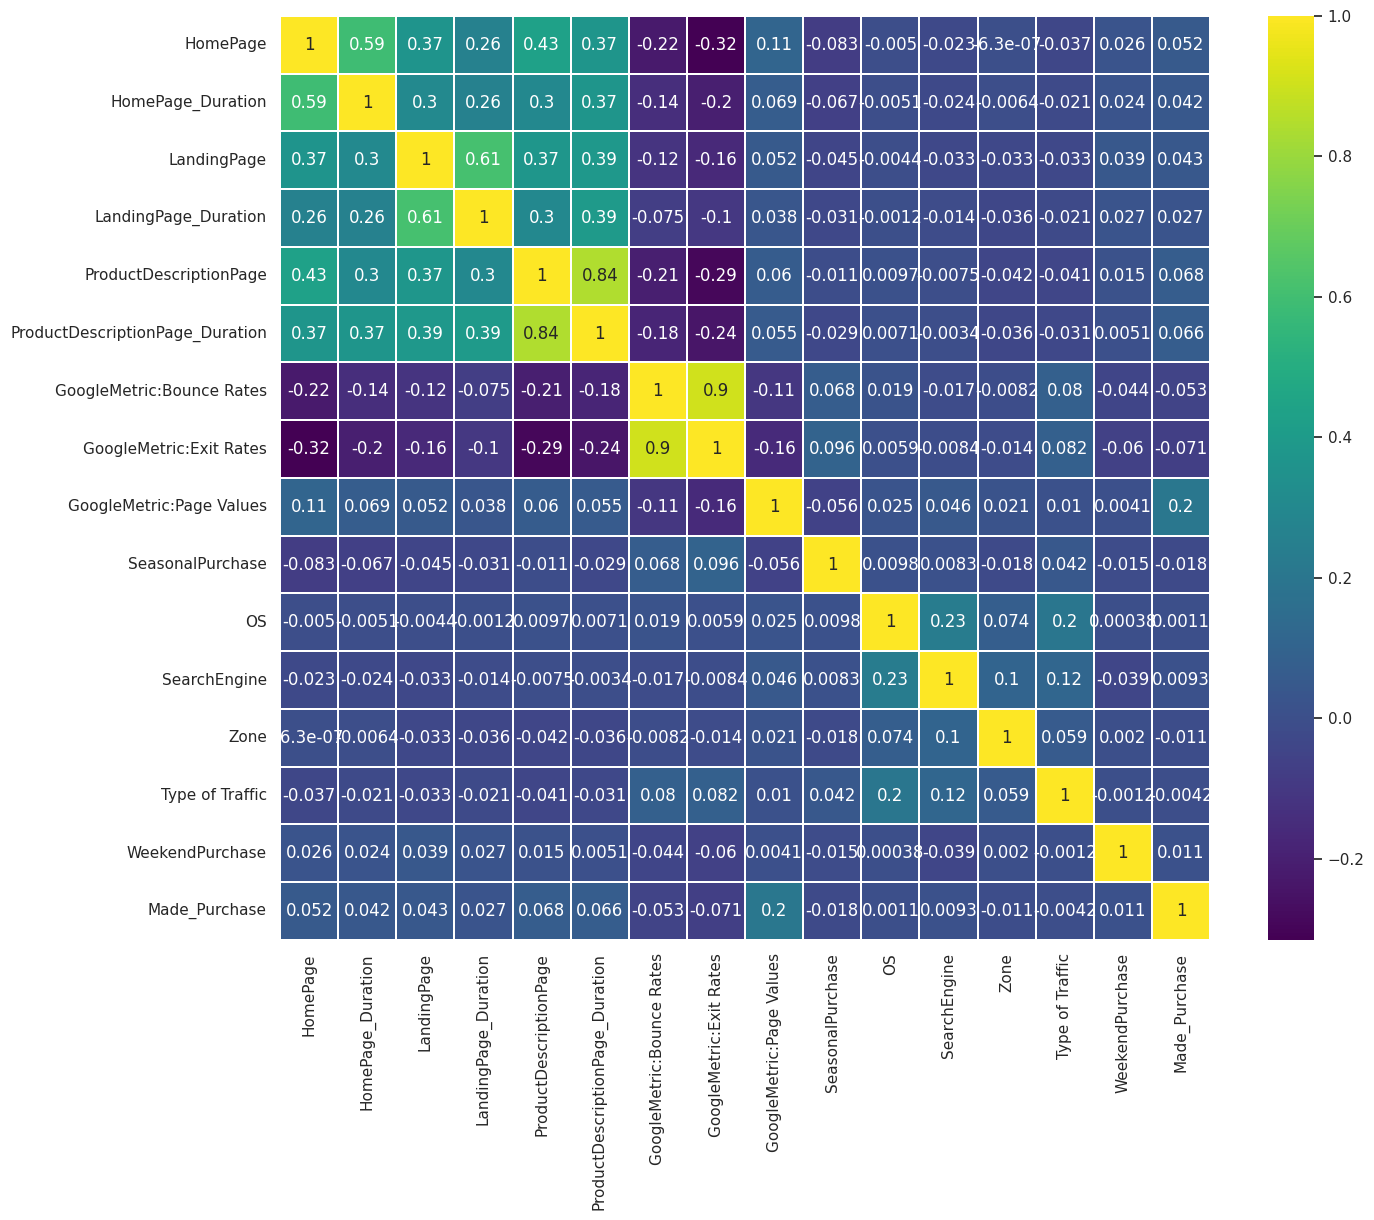

In [104]:
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(),linewidths=.1,cmap="viridis", annot=True)
plt.yticks(rotation=0);

In [105]:
# Optimized feature set by removing highly correlated columns ('Bounce Rates', 'ProductDesc.Duration') to avoid repetitive information.
#data.pop('GoogleMetric:Bounce Rates')
#data.pop('ProductDescriptionPage_Duration')
columns_to_drop = ['GoogleMetric:Bounce Rates', 'ProductDescriptionPage_Duration']
for col in columns_to_drop:
    if col in data.columns:
        data.drop(col, axis=1, inplace=True)
    else:
        print(f"Warning: Column '{col}' not found in DataFrame.")


In [106]:
#we can see the two columns have been removed
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   HomePage                  14731 non-null  float64
 1   HomePage_Duration         14731 non-null  float64
 2   LandingPage               14731 non-null  float64
 3   LandingPage_Duration      14731 non-null  float64
 4   ProductDescriptionPage    14731 non-null  float64
 5   GoogleMetric:Exit Rates   14731 non-null  float64
 6   GoogleMetric:Page Values  14731 non-null  float64
 7   SeasonalPurchase          14731 non-null  float64
 8   Month_SeasonalPurchase    14731 non-null  object 
 9   OS                        14731 non-null  float64
 10  SearchEngine              14731 non-null  float64
 11  Zone                      14731 non-null  float64
 12  Type of Traffic           14731 non-null  float64
 13  CustomerType              14731 non-null  object 
 14  Gender

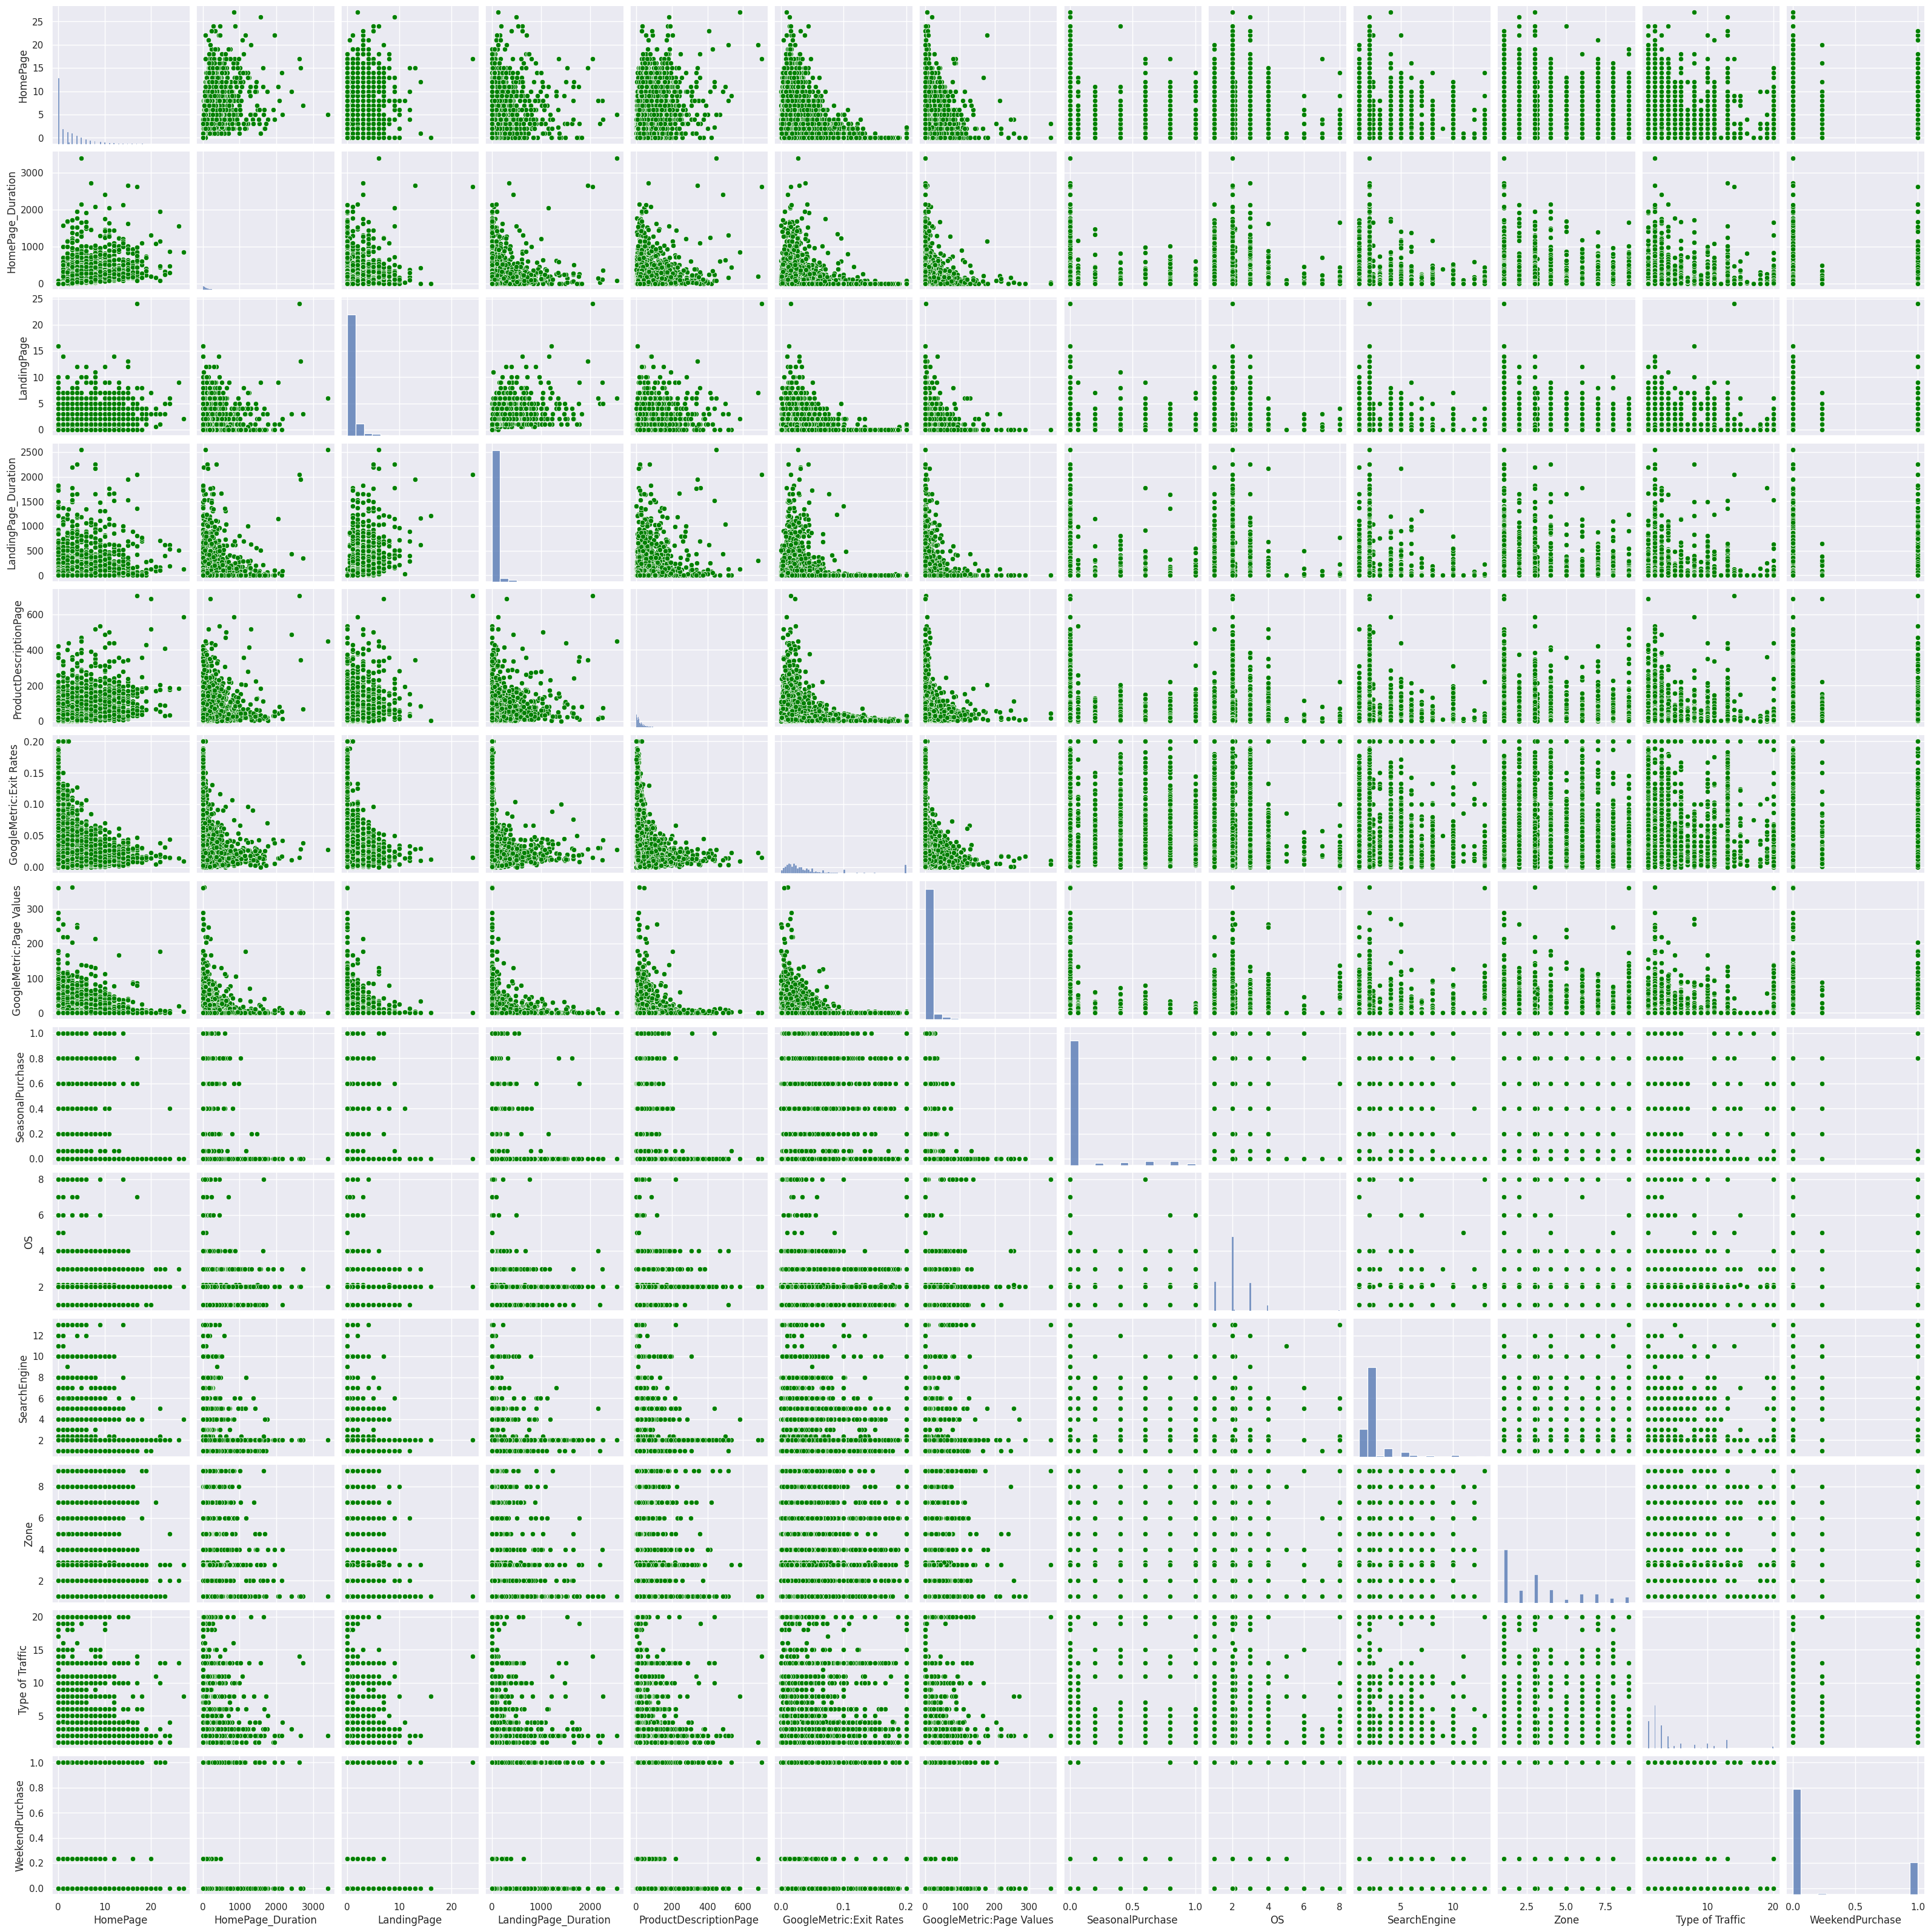

In [107]:
# we will analyze the correlations between numerical columns.
numerical_columns = ['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
                     'ProductDescriptionPage', 'GoogleMetric:Exit Rates', 'GoogleMetric:Page Values',
                     'SeasonalPurchase', 'OS', 'SearchEngine', 'Zone', 'Type of Traffic', 'WeekendPurchase']
sns.pairplot(data[numerical_columns], plot_kws={'color': 'green'})
plt.show()

<font color='lightblue'> This part iterates through all numerical columns in the DataFrame and creates a separate histogram for each. These histograms visually represent the counts of different values within each column.



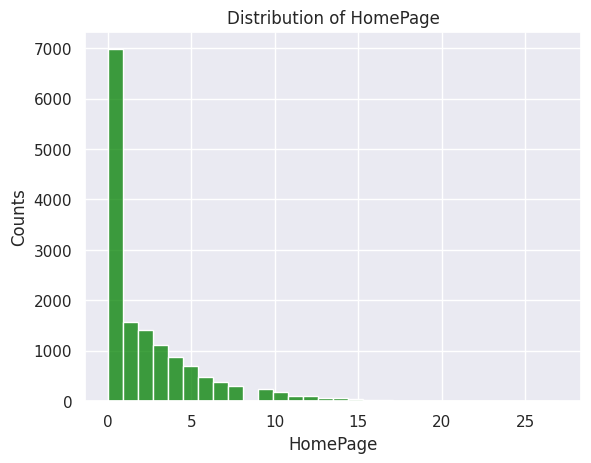

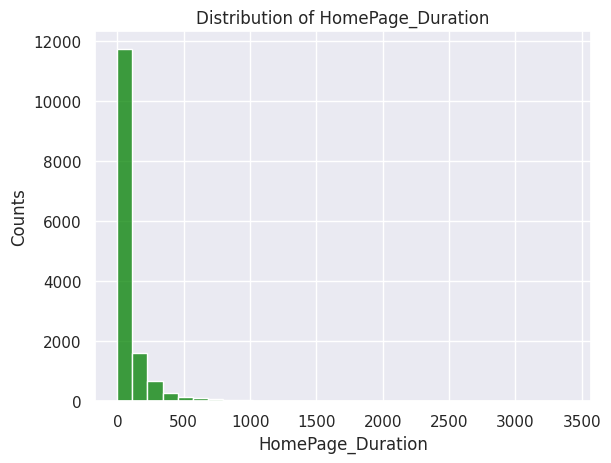

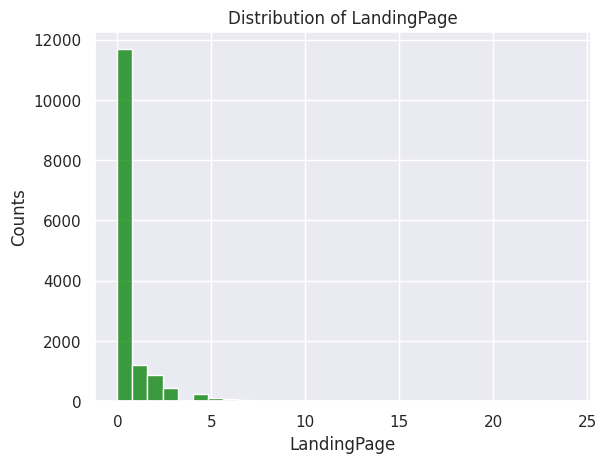

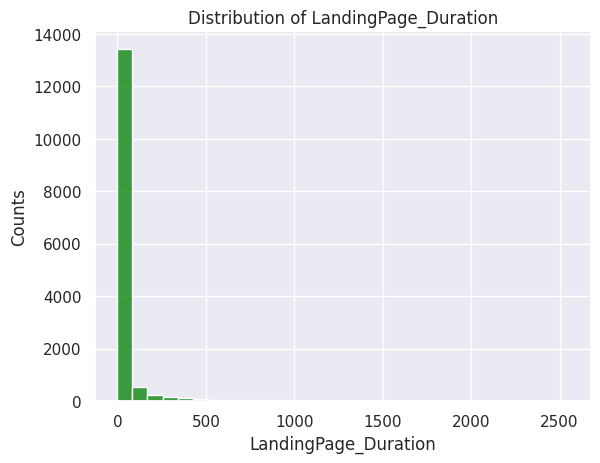

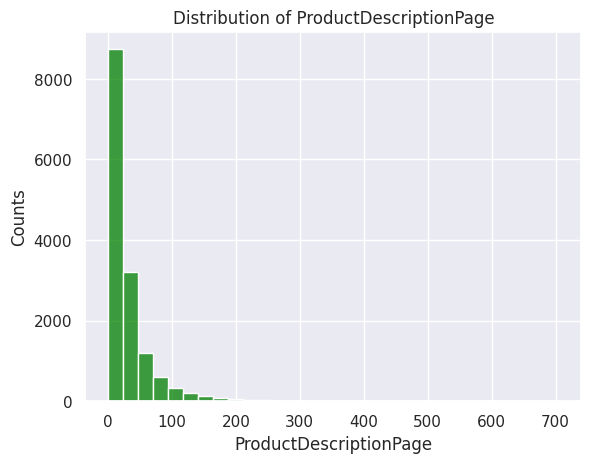

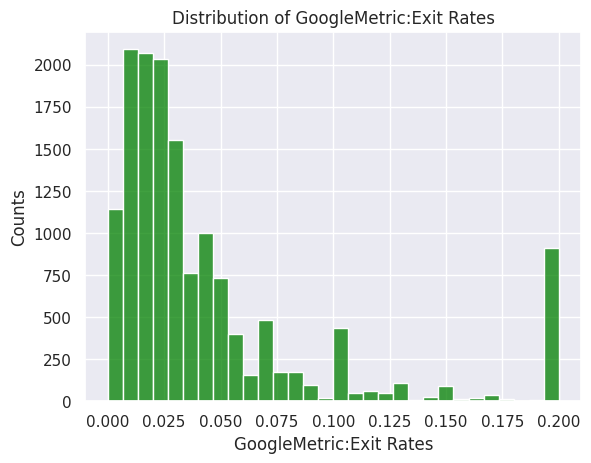

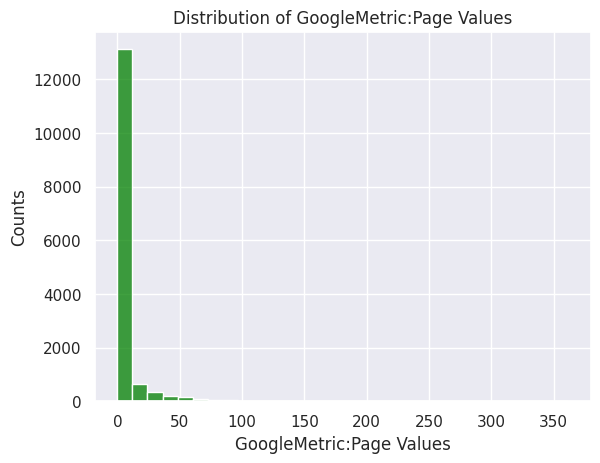

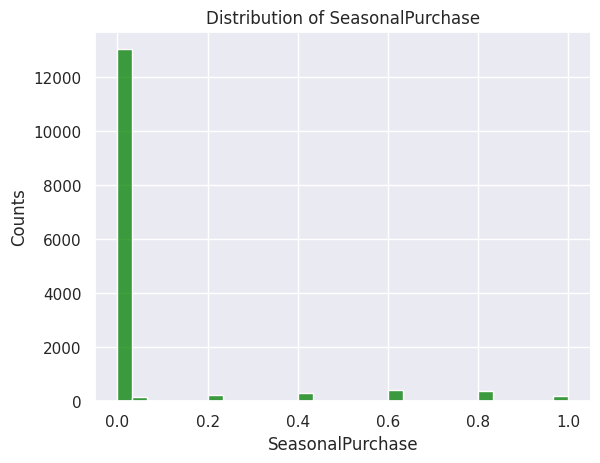

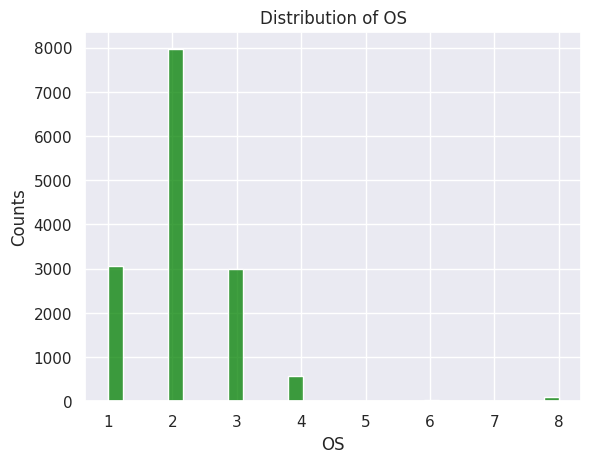

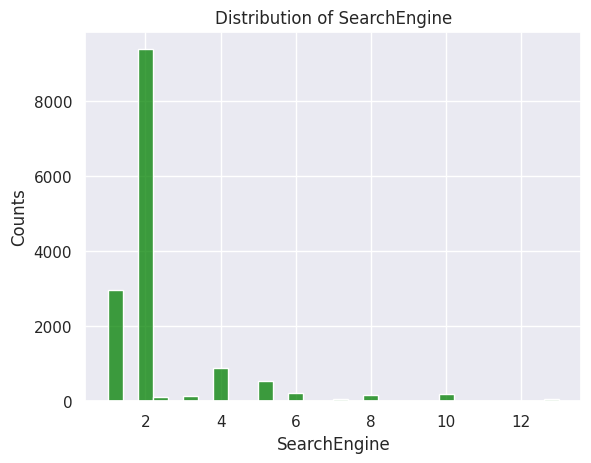

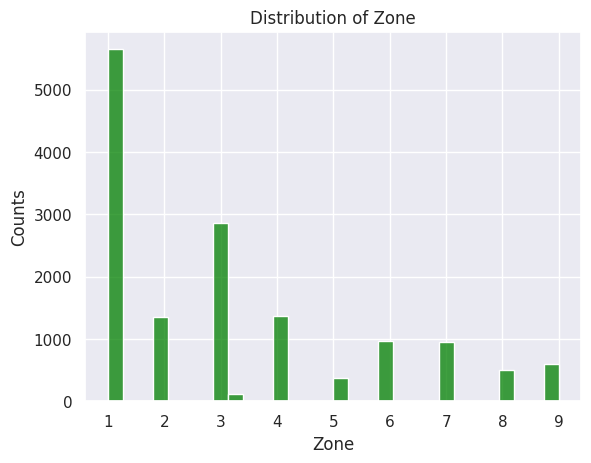

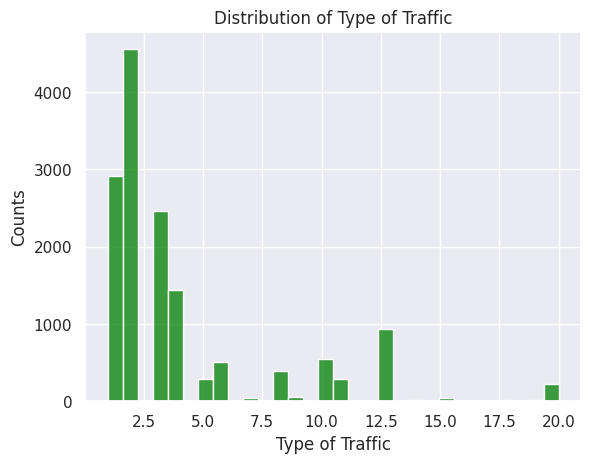

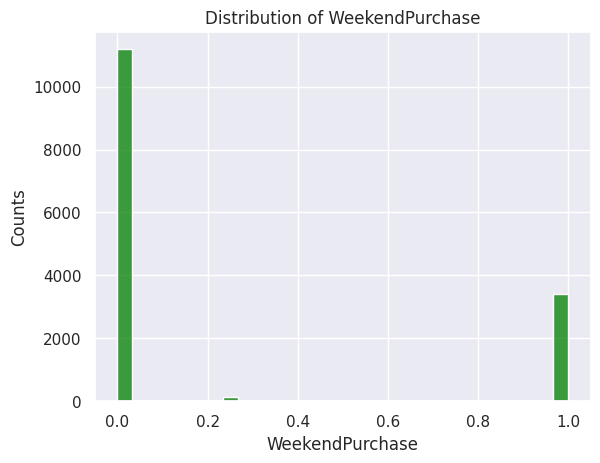

In [108]:
for col in numerical_columns:
    sns.histplot(data=data, x=col, bins=30, color='green', line_kws={'color': 'blue'})
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.grid(True)
    plt.show()

<font color='lightblue'> This part iterates through categorical columns in the DataFrame, creating individual histograms for each. These bars represent the counts of different values within each category, providing insights into data distribution."

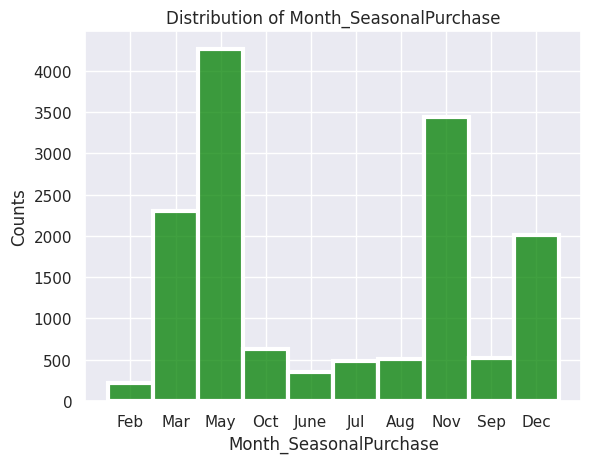

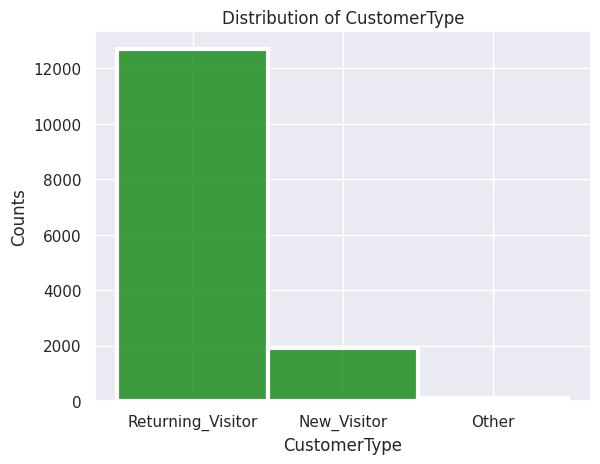

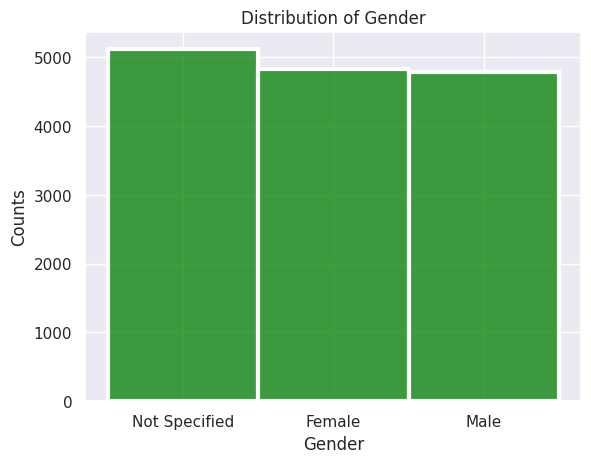

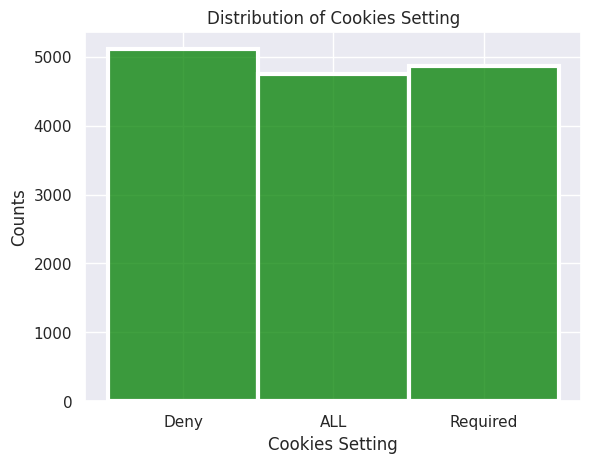

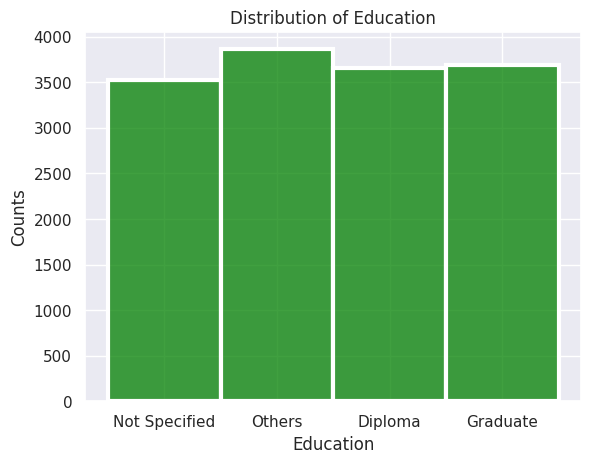

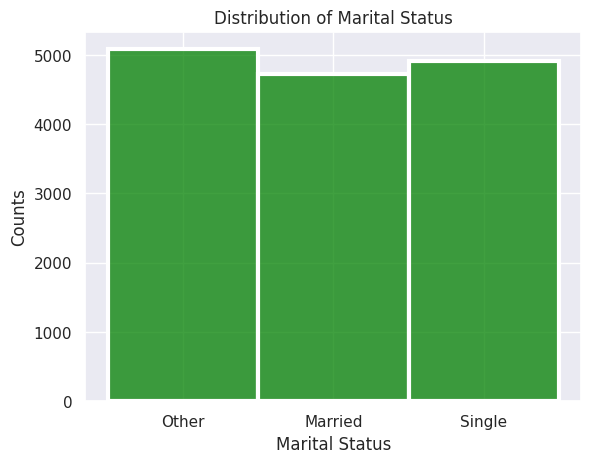

In [109]:
for col in categorical_cells:
    sns.histplot(data=data, x=col, bins=30,
                 color='green', edgecolor='white', linewidth=3)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.grid(True)
    plt.show()

<font color='lightblue'> To address potential issues with 'unexpected_value', this code replaces them with the most frequent category (mode) found within each corresponding categorical column, ensuring data consistency.

In [110]:
for column in categorical_cells:
  mode_value = data[column].mode()[0]
  data[column] = data[column].replace('unexpected_value', mode_value)

<font color = 'lightblue'> Here we use a logarithmic transformation, this tool makes skewed data more symmetrical and closer to normal distribution, often beneficial for statistical analyses and modeling that assume normality.

In [111]:
skewed_columns = numerical_columns
data[skewed_columns] = data[skewed_columns].apply(lambda x: np.log1p(x))
object_columns = ['Month_SeasonalPurchase', 'CustomerType', 'Gender', 'Cookies Setting', 'Education', 'Marital Status']
# Here we convert the object column into numerical representations suitable for machine learning models by applying one-hot encoding
data_encoded = pd.get_dummies(data, columns=object_columns)
# we check the the data has been updated with a one-hot encoded DataFrame
data_encoded.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,OS,SearchEngine,...,Cookies Setting_ALL,Cookies Setting_Deny,Cookies Setting_Required,Education_Diploma,Education_Graduate,Education_Not Specified,Education_Others,Marital Status_Married,Marital Status_Other,Marital Status_Single
0,0.000000,0.0,0.0,0.0,0.693147,0.182322,0.0,0.000000,1.609438,0.693147,...,0,1,0,0,0,1,0,0,1,0
1,0.000000,0.0,0.0,0.0,1.098612,0.131028,0.0,0.000000,1.386294,1.098612,...,0,1,0,0,0,0,1,1,0,0
2,0.000000,0.0,0.0,0.0,2.397895,0.048790,0.0,0.000000,1.386294,1.386294,...,1,0,0,0,0,0,1,1,0,0
3,0.000000,0.0,0.0,0.0,0.693147,0.182322,0.0,0.336472,1.098612,1.609438,...,1,0,0,1,0,0,0,0,0,1
4,0.693147,0.0,0.0,0.0,0.000000,0.182322,0.0,0.000000,0.693147,1.098612,...,0,1,0,1,0,0,0,0,1,0


In [112]:
data['Made_Purchase'] = data['Made_Purchase'].astype(int)

<font color='lightblue'> Machine learning struggles when training data has vastly different numbers of examples for each class (imbalanced data). This creates biased models that struggle with rare classes. Here's how to fix it.

In [113]:
data['Made_Purchase'].value_counts()

0    9065
1    5666
Name: Made_Purchase, dtype: int64

<font color='lightblue'> This pie chart serves as a visual exploration of the purchase propensity within the data. It displays the proportion of individuals engaging in purchase activity (represented by the 1 value in the Made_Purchase variable) compared to those who did not.

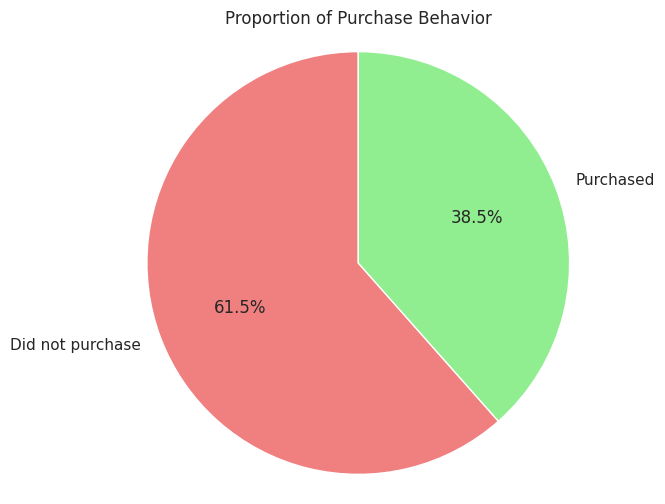

In [114]:
plt.figure(figsize=(6, 6))
labels = ['Did not purchase', 'Purchased']
sizes = data['Made_Purchase'].value_counts().values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title('Proportion of Purchase Behavior')
plt.axis('equal')  # Equal aspect ratio for a circular pie chart
plt.show()

In [115]:
purchased_data = data[data["Made_Purchase"] == 1]
purchased_data

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,Month_SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
43,1.386294,4.486762,0.000000,0.000000,3.332205,0.012564,3.174549,0.587787,Feb,1.098612,1.098612,1.386294,0.693147,Returning_Visitor,Male,Deny,Others,Married,0.0,1
50,2.397895,6.914400,0.000000,0.000000,3.610918,0.014389,2.520870,0.000000,Feb,1.098612,1.945910,0.693147,1.098612,Returning_Visitor,Not Specified,Required,Not Specified,Single,0.0,1
120,2.302585,4.722953,0.693147,3.901973,3.912023,0.020497,0.995477,0.000000,Mar,1.098612,1.098612,2.079442,1.098612,Returning_Visitor,Female,Required,Others,Married,0.0,1
128,1.098612,4.043051,0.693147,4.976734,4.219508,0.005780,3.012720,0.000000,Mar,1.098612,1.098612,1.609438,1.098612,New_Visitor,Male,Required,Others,Other,0.0,1
130,0.000000,0.000000,0.000000,0.000000,2.890372,0.001665,4.702079,0.000000,Mar,1.098612,1.098612,2.302585,1.098612,New_Visitor,Female,ALL,Graduate,Single,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14726,0.693147,1.609438,0.000000,0.000000,3.688879,0.017446,0.000000,0.000000,Nov,1.386294,1.098612,1.945910,1.386294,Returning_Visitor,Female,Deny,Others,Married,0.0,1
14727,2.197225,4.770886,1.098612,4.060443,2.484907,0.011018,0.000000,0.000000,May,1.098612,1.098612,1.098612,1.609438,Returning_Visitor,Not Specified,ALL,Diploma,Married,0.0,1
14728,1.098612,4.338597,1.098612,6.482801,2.397895,0.023065,0.000000,0.000000,Aug,1.098612,1.098612,1.609438,1.098612,Returning_Visitor,Not Specified,Required,Others,Single,0.0,1
14729,0.000000,0.000000,0.000000,0.000000,1.945910,0.032790,0.000000,0.000000,Mar,1.098612,1.609438,1.609438,0.693147,Returning_Visitor,Not Specified,Required,Not Specified,Married,0.0,1


<font color='lightblue'> This code implements exploratory data visualization to investigate potential relationships between purchase behavior and various categories. It filters the data for purchasing individuals (Made_Purchase equal to 1) and then iterates through specified categories, generating histograms to visualize the distribution of each category within the purchasing population. This allows for initial exploration of how different factors might influence purchase behavior.

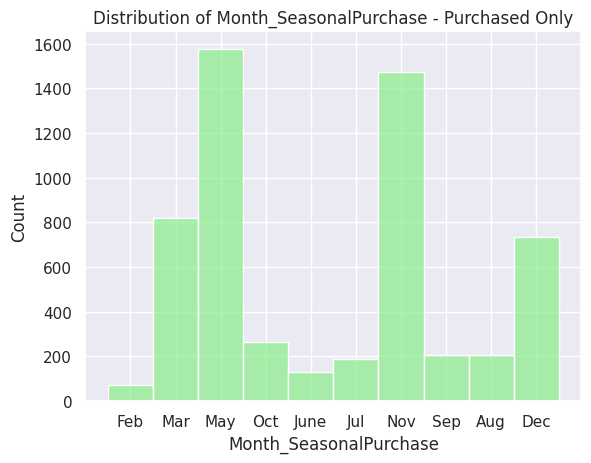

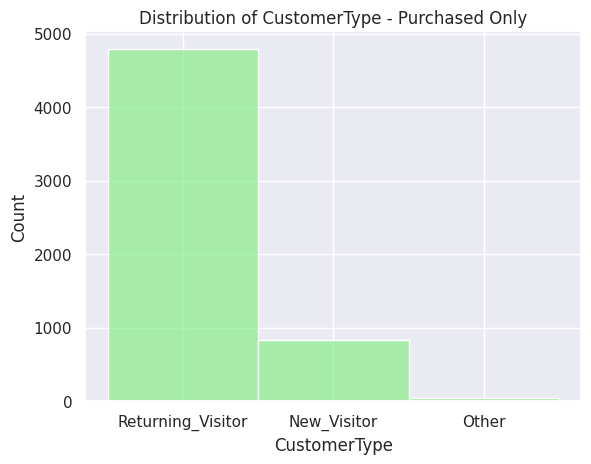

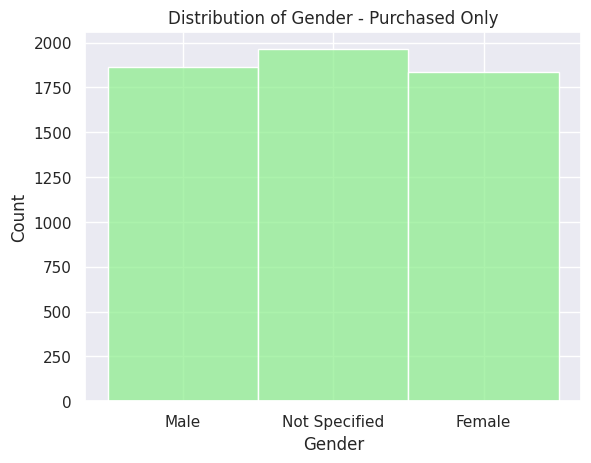

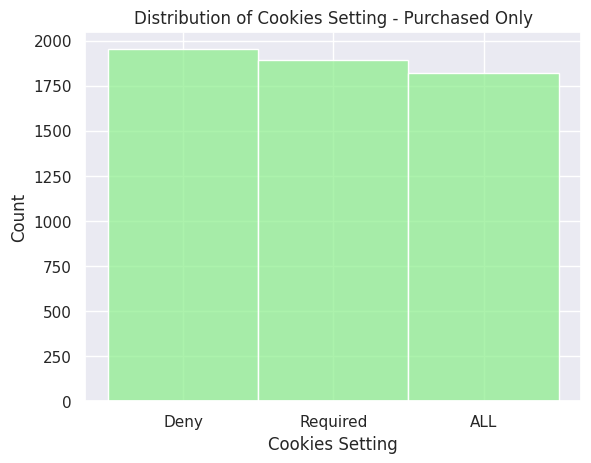

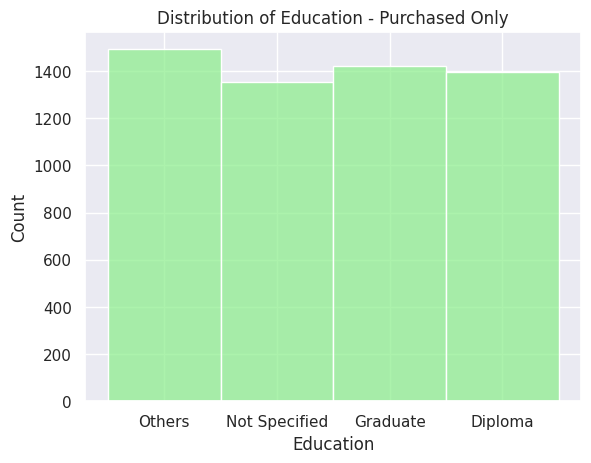

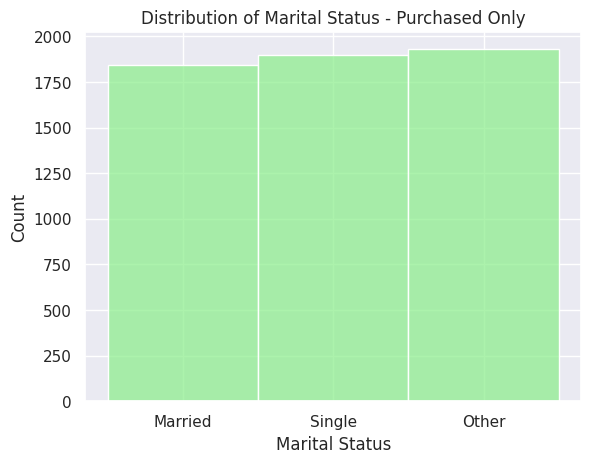

In [116]:
category_list = ['Month_SeasonalPurchase', 'CustomerType', 'Gender', 'Cookies Setting', 'Education', 'Marital Status']

for category in category_list:
  # Distribution (histogram or kernel density plot)
  sns.histplot(data=purchased_data, x=category, bins=30, color='lightgreen')
  plt.title(f'Distribution of {category} - Purchased Only')
  plt.xlabel(category)
  plt.ylabel('Count')
  plt.grid(True)
  plt.show()

<font color='lightblue'> Now we start to assign the variables x and y

In [117]:
X = pd.get_dummies(data[['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
                         'ProductDescriptionPage', 'GoogleMetric:Exit Rates', 'GoogleMetric:Page Values',
                         'SeasonalPurchase', 'Month_SeasonalPurchase', 'OS', 'SearchEngine', 'Zone', 'Type of Traffic',
                         'CustomerType', 'Gender', 'Cookies Setting', 'Education', 'Marital Status', 'WeekendPurchase']])
y = data['Made_Purchase']

In [118]:
# Performing train-test split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<font color='lightblue'> Decision Tree classifier

In [119]:
import warnings
warnings.filterwarnings('ignore')
# Define DecisionTreeClassifier
clf = DecisionTreeClassifier()
# Define parameter grid for GridSearchCV
param_grid = { 'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4], 'max_features': ['auto', 'sqrt', 'log2'],
               'criterion': ['gini', 'entropy'] }
# Perform GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
# Best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
# then we use those parameters to train the DecisionTreeClassifier
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(X_train, y_train)
# Predictions on test set
y_pred = best_dt_classifier.predict(X_test)
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
decisiontree_report = classification_report(y_test, y_pred)
# Displaying classification report
print(decisiontree_report)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.6366515837104072
              precision    recall  f1-score   support

           0       0.64      0.97      0.77      2757
           1       0.62      0.09      0.15      1663

    accuracy                           0.64      4420
   macro avg       0.63      0.53      0.46      4420
weighted avg       0.63      0.64      0.54      4420



F1 Score: 0.15473684210526314
AUC-ROC: 0.5743695978813892


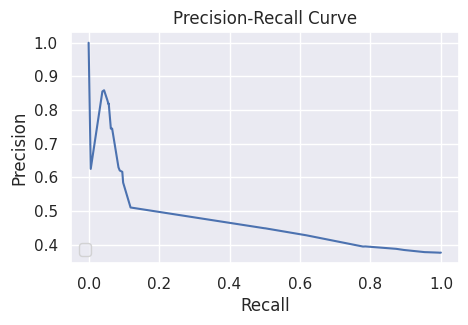

Confusion Matrix:
[[2667   90]
 [1516  147]]


In [120]:
#F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)
# Area Under the ROC Curve (AUC-ROC)
auc_roc = roc_auc_score(y_test, best_dt_classifier.predict_proba(X_test)[:, 1])
print("AUC-ROC:", auc_roc)
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, best_dt_classifier.predict_proba(X_test)[:, 1])
pr_auc = auc(recall, precision)

plt.figure(figsize=(5, 3))
plt.plot(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

 <font color='lightblue'>SVM (Support Vector Machine) Classifier

In [121]:
# SVM classifier
clf = SVC(kernel='rbf', C=1.0, gamma='scale', probability = True, random_state=42)
# lets train the classifier
clf.fit(X_train, y_train)
# Making predictions on the test set
y_pred = clf.predict(X_test)
# Calculating the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
svm_report = classification_report(y_test, y_pred)
print(svm_report)

Accuracy: 0.6728506787330317
              precision    recall  f1-score   support

           0       0.68      0.90      0.77      2757
           1       0.64      0.29      0.40      1663

    accuracy                           0.67      4420
   macro avg       0.66      0.60      0.59      4420
weighted avg       0.67      0.67      0.63      4420



F1 Score: 0.401985111662531
AUC-ROC: 0.5808318016720572


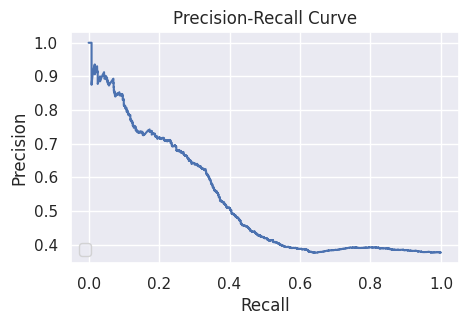

Confusion Matrix:
[[2488  269]
 [1177  486]]


In [122]:
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)
auc_roc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
print("AUC-ROC:", auc_roc)
precision, recall, thresholds = precision_recall_curve(y_test, clf.predict_proba(X_test)[:, 1])
pr_auc = auc(recall, precision)
plt.figure(figsize=(5, 3))
plt.plot(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

 <font color='lightblue'>Gradient Booster Classifier

In [123]:
import warnings
warnings.filterwarnings('ignore')
# Gradient Boosting classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
# here we train the Gradient Boosting classifier
clf.fit(X_train, y_train)
# Making predictions on the test set
y_pred = clf.predict(X_test)
# we get the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
gradientboost_report = classification_report(y_test, y_pred)
# here we display the classification report
print(gradientboost_report)

Accuracy: 0.6739819004524887
              precision    recall  f1-score   support

           0       0.68      0.91      0.78      2757
           1       0.66      0.27      0.39      1663

    accuracy                           0.67      4420
   macro avg       0.67      0.59      0.58      4420
weighted avg       0.67      0.67      0.63      4420



F1 Score: 0.3881104033970276
AUC-ROC: 0.5994102149865722


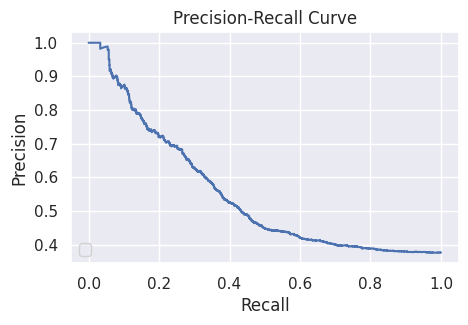

Confusion Matrix:
[[2522  235]
 [1206  457]]


In [124]:
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)
auc_roc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
print("AUC-ROC:", auc_roc)
precision, recall, thresholds = precision_recall_curve(y_test, clf.predict_proba(X_test)[:, 1])
pr_auc = auc(recall, precision)
plt.figure(figsize=(5, 3))
plt.plot(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

 <font color='lightblue'>Random Forest Classifier

In [125]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [25, 50, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get best parameters from GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train Random Forest classifier with best parameters
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
best_rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
randomforest_report = classification_report(y_test, y_pred)
print(randomforest_report)

Best Parameters: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy: 0.6771493212669684
              precision    recall  f1-score   support

           0       0.67      0.93      0.78      2757
           1       0.69      0.25      0.37      1663

    accuracy                           0.68      4420
   macro avg       0.68      0.59      0.58      4420
weighted avg       0.68      0.68      0.63      4420



F1 Score: 0.3727472527472528
AUC-ROC: 0.6100534342037793


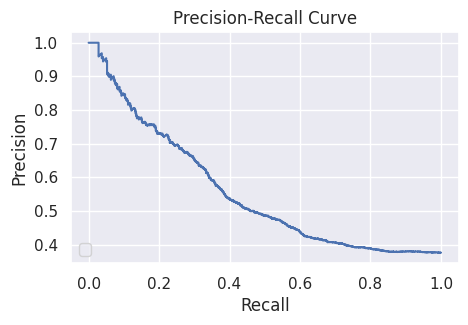

Confusion Matrix:
[[2569  188]
 [1239  424]]


In [126]:
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)
auc_roc = roc_auc_score(y_test, best_rf_classifier.predict_proba(X_test)[:, 1])
print("AUC-ROC:", auc_roc)
precision, recall, thresholds = precision_recall_curve(y_test, best_rf_classifier.predict_proba(X_test)[:, 1])
pr_auc = auc(recall, precision)
plt.figure(figsize=(5, 3))
plt.plot(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

 <font color='lightblue'>NB (Naive Bayes) Classifier

In [127]:
# Creating a Naive Bayes classifier
clf_nb = GaussianNB()
# Define parameter grid for GridSearchCV
param_grid = { 'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5] }
# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=clf_nb, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
# Best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
# Train Gaussian Naive Bayes classifier with best parameters
best_nb_classifier = GaussianNB(var_smoothing=best_params['var_smoothing'])
best_nb_classifier.fit(X_train, y_train)
# Making predictions on the test set
y_pred_nb = best_nb_classifier.predict(X_test)
# Calculating the accuracy of the classifier
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy_nb)
# Generating a classification report
nb_report = classification_report(y_test, y_pred_nb)
# Displaying the classification report
print(nb_report)

Best Parameters: {'var_smoothing': 1e-09}
Accuracy: 0.6226244343891403
              precision    recall  f1-score   support

           0       0.68      0.73      0.71      2757
           1       0.50      0.44      0.47      1663

    accuracy                           0.62      4420
   macro avg       0.59      0.59      0.59      4420
weighted avg       0.61      0.62      0.62      4420



F1 Score: 0.3727472527472528


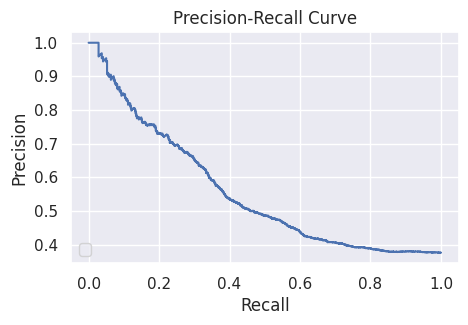

Confusion Matrix:
[[2569  188]
 [1239  424]]


In [128]:
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)
plt.figure(figsize=(5, 3))
plt.plot(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

<font color='lightblue'> By leveraging insights from each model's report, we were able to make an informed decision and choose the model that best aligns with our goals.

In [133]:
reports_accuracy = [ {'Model': 'Gradient Boosting classifier', 'Accuracy': 0.674, 'Report': gradientboost_report },
 {'Model': 'SVM(support vector machines)', 'Accuracy': 0.673, 'Report': svm_report},
  {'Model': 'KNN(k-nearest neighbors algorithm)', 'Accuracy': 0.578, 'Report': nb_report },
   {'Model': 'Random Forest classifier', 'Accuracy': 0.533, 'Report': randomforest_report },
    {'Model': 'Decision Tree classifier', 'Accuracy': 0.477, 'Report': decisiontree_report}]
# Convert the list of dictionaries into a DataFrame
datareports = pd.DataFrame(reports_accuracy)
# Set the index to the model names
datareports.set_index('Model', inplace=True)
# Print the DataFrame
print(datareports)
# Print reports
for idx, row in datareports.iterrows():
  print("\nModel: ", idx)
  print("Accuracy: ", row['Accuracy'])
  print("Report: \n", row['Report'])

                                    Accuracy  \
Model                                          
Gradient Boosting classifier           0.674   
SVM(support vector machines)           0.673   
KNN(k-nearest neighbors algorithm)     0.578   
Random Forest classifier               0.533   
Decision Tree classifier               0.477   

                                                                               Report  
Model                                                                                  
Gradient Boosting classifier                      precision    recall  f1-score   ...  
SVM(support vector machines)                      precision    recall  f1-score   ...  
KNN(k-nearest neighbors algorithm)                precision    recall  f1-score   ...  
Random Forest classifier                          precision    recall  f1-score   ...  
Decision Tree classifier                          precision    recall  f1-score   ...  

Model:  Gradient Boosting classifier
Accuracy:

In [134]:
from tabulate import tabulate
# Here we convert the DataFrame to a table format
table = tabulate(datareports, headers='keys', tablefmt='heavy_grid')
print(table)

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Model                              ┃   Accuracy ┃ Report                                                ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ Gradient Boosting classifier       ┃      0.674 ┃ precision    recall  f1-score   support               ┃
┃                                    ┃            ┃                                                       ┃
┃                                    ┃            ┃            0       0.68      0.91      0.78      2757 ┃
┃                                    ┃            ┃            1       0.66      0.27      0.39      1663 ┃
┃                                    ┃            ┃                                                       ┃
┃                                    ┃            ┃     accuracy                           0.67      4420 ┃
┃                           

<font color='lightblue'> While the Gradient Boosting classifier boasts the highest accuracy (67.4%) among the tested models, relying solely on this metric can be misleading. While it suggests strong potential for accurate predictions, accuracy alone doesn't guarantee a model's true performance. It's essential to remember that models prone to overfitting often exhibit exceptional performance on training data but struggle with unseen data. Further evaluation on a separate validation set